In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

fn="../data/gridCellData.pickle" # name of our data file


with open(fn, "rb") as myFile: # with statement, will close the file automatically when we are done
    myData = pickle.load(myFile)

# Exercise 1

In [4]:
print(type(myData))

<class 'dict'>


This is a dictionary. You can have a look at the keys in the dictionary with the `keys()` method.

In [5]:
myData.keys()

dict_keys(['spike_trains', 'position'])

myData contains a `spike_trains` and `position`.

In [6]:
myData["spike_trains"]

[array([1.76150000e-01, 1.17540000e+00, 2.87110000e+00, ...,
        1.24176155e+03, 1.24297930e+03, 1.24310075e+03]),
 array([8.34000000e-02, 2.13350000e-01, 3.34850000e-01, ...,
        1.24281570e+03, 1.24290600e+03, 1.24299165e+03]),
 array([   2.0036 ,    3.85695,    4.10675, ..., 1243.3503 , 1243.3593 ,
        1243.3636 ]),
 array([7.83250000e-01, 8.52250000e-01, 8.66450000e-01, ...,
        1.23960960e+03, 1.24111530e+03, 1.24325105e+03]),
 array([4.76000000e-02, 1.71100000e-01, 3.08350000e-01, ...,
        1.24331005e+03, 1.24331295e+03, 1.24334460e+03])]

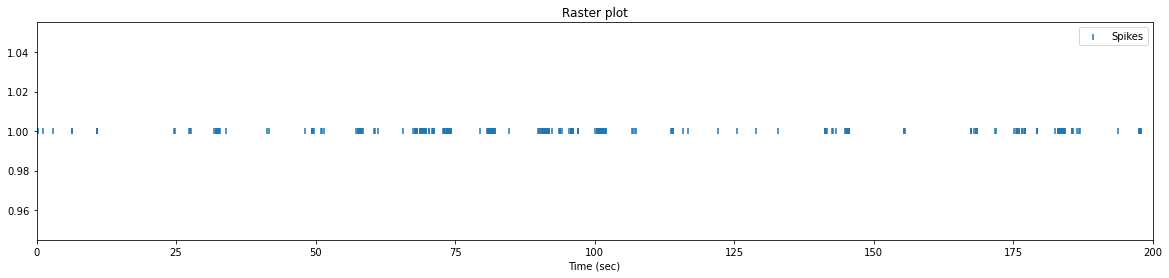

In [25]:
st = myData["spike_trains"][0]
plt.figure(figsize=(20,4))
plt.scatter(st,np.ones_like(st),marker="|", label="Spikes")
plt.xlim(0,200)
plt.xlabel("Time (sec)")
plt.title("Raster plot")
plt.legend()
plt.show()

In [8]:
myData["position"]

{'time': array([0.00000e+00, 2.00000e-02, 4.00000e-02, ..., 1.24332e+03,
        1.24334e+03, 1.24336e+03]),
 'x': array([nan, nan, nan, ..., nan, nan, nan]),
 'y': array([nan, nan, nan, ..., nan, nan, nan])}

# Exercise 2

In [12]:
duration = 1243
stList = myData["spike_trains"] # get the list of 5 arrays out of the dictionary
stList[0].shape[0] # You can count the spike using the shape attribute of the NumpY array.

2846

In [13]:
stList[0].shape[0]/duration #spikes/seconds

2.2896218825422365

In [177]:
for a in stList:
    print("{:.2f} Hz".format(a.shape[0]/duration))

2.29 Hz
6.33 Hz
4.15 Hz
3.90 Hz
7.27 Hz


# Exercise 3

In [14]:
p = myData["position"]
p

{'time': array([0.00000e+00, 2.00000e-02, 4.00000e-02, ..., 1.24332e+03,
        1.24334e+03, 1.24336e+03]),
 'x': array([nan, nan, nan, ..., nan, nan, nan]),
 'y': array([nan, nan, nan, ..., nan, nan, nan])}

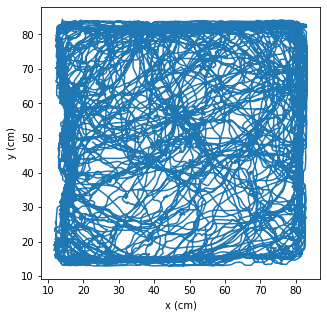

In [15]:
plt.figure(figsize=(5,5))
plt.plot(p["x"],p["y"])
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()

# Exercise 4

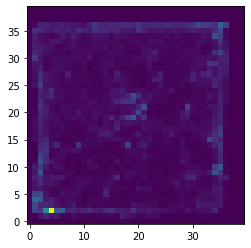

In [139]:
occMap, _, _ = np.histogram2d(p["x"],p["y"],bins=bins)
plt.imshow(occMap.T,origin="lower")
plt.show()

# Exercise 5

In [17]:
from scipy.interpolate import interp1d
st = myData["spike_trains"][3]

fx = interp1d(p["time"], p["x"]) # create function that will interpolate
fy = interp1d(p["time"], p["y"]) # create function that will interpolate

spikeX = fx(st)
spikeY = fy(st)

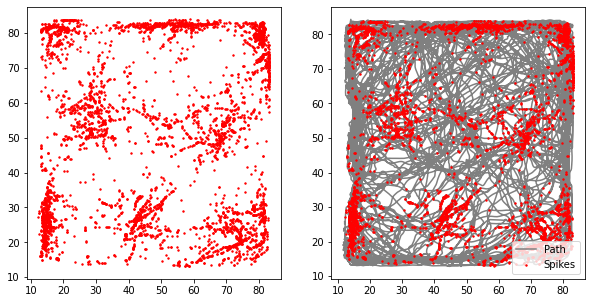

In [18]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].scatter(spikeX,spikeY,s=2,c="red")

ax[1].plot(p["x"],p["y"],c="grey",zorder=1,label="Path")
ax[1].scatter(spikeX,spikeY,s=2,c="red",zorder=3,label="Spikes")
ax[1].legend()

plt.show()